
# Assignment 6: Multiple Linear Regression (MLR)

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

sns.set(style="whitegrid")


In [2]:
df = pd.read_csv("ToyotaCorolla - MLR.csv")
df.head()


,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [3]:
print("Shape:", df.shape)
df.info()

print("\nMissing values per column:\n", df.isnull().sum())


Shape: (1436, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB

Missing values per column:
 Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64


In [4]:
df.describe()


,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


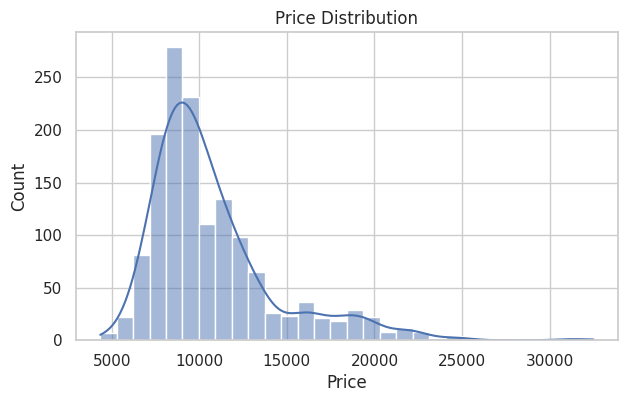

In [5]:
plt.figure(figsize=(7,4))
sns.histplot(df["Price"], bins=30, kde=True)
plt.title("Price Distribution")
plt.show()


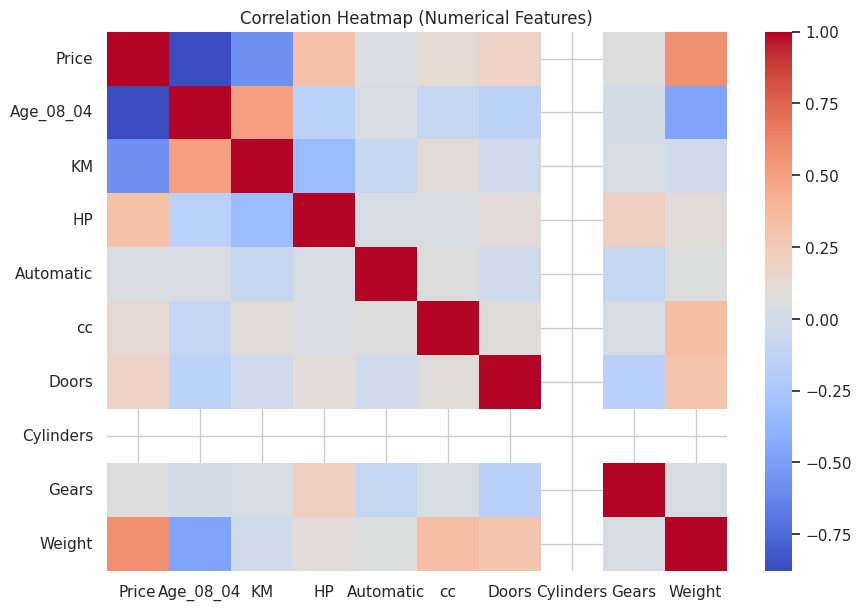

In [6]:
plt.figure(figsize=(10,7))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()


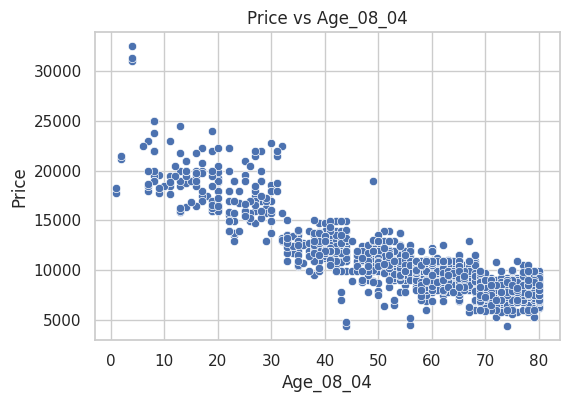

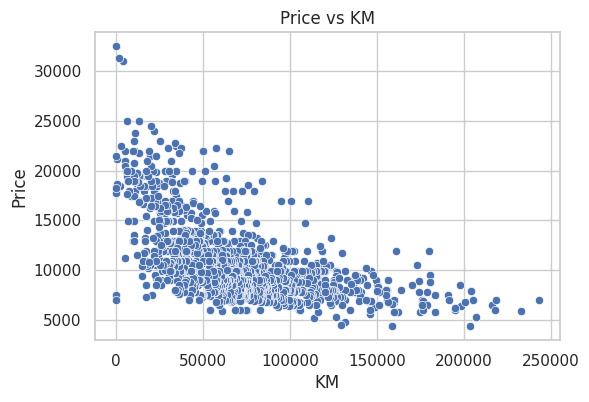

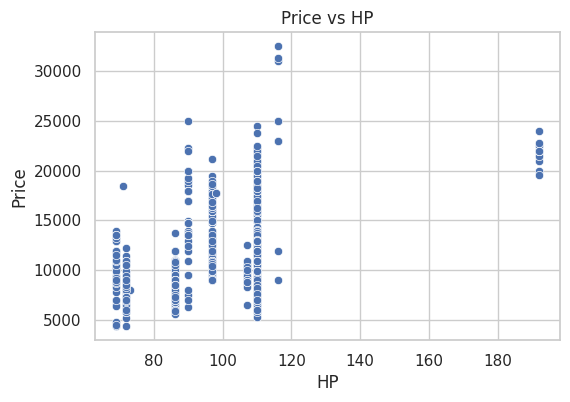

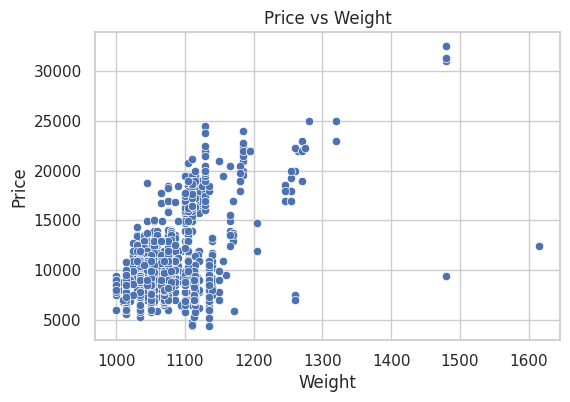

In [7]:
key_cols = ["Age_08_04", "KM", "HP", "Weight"]
for col in key_cols:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=df[col], y=df["Price"])
    plt.title(f"Price vs {col}")
    plt.show()

In [8]:
df = df.copy()
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())


##One-Hot Encode for FuelType

In [9]:
df = pd.get_dummies(df, columns=["Fuel_Type"], drop_first=True)
df.head()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,2000,3,4,5,1165,True,False
1,13750,23,72937,90,0,2000,3,4,5,1165,True,False
2,13950,24,41711,90,0,2000,3,4,5,1165,True,False
3,14950,26,48000,90,0,2000,3,4,5,1165,True,False
4,13750,30,38500,90,0,2000,3,4,5,1170,True,False


In [10]:
X = df.drop("Price", axis=1)
y = df["Price"]

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (1436, 11)
y shape: (1436,)


##Split Data

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train size:", X_train.shape, " Test size:", X_test.shape)


Train size: (1148, 11)  Test size: (288, 11)


In [12]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[-0.30982235, -1.23079748, -0.28585438, ..., -0.94209005,
        -0.35735329,  0.38321423],
       [ 0.64944782,  0.30637886,  0.59013961, ..., -0.35237411,
        -0.35735329,  0.38321423],
       [ 0.16981273,  1.62191904, -1.97045821, ...,  1.22020173,
         2.79835116, -2.60950643],
       ...,
       [-0.84275022, -0.73086886,  0.59013961, ...,  0.13905584,
        -0.35735329,  0.38321423],
       [ 1.07579011, -1.82785114,  0.59013961, ...,  0.80740057,
        -0.35735329,  0.38321423],
       [ 0.16981273, -0.84723316,  0.59013961, ..., -0.4506601 ,
        -0.35735329,  0.38321423]])

Model 1 Linear with all the variables chosen

In [13]:
model1 = LinearRegression()
model1.fit(X_train_scaled, y_train)

y_pred1 = model1.predict(X_test_scaled)


In [14]:
coef_df1 = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model1.coef_
}).sort_values(by="Coefficient", ascending=False)

coef_df1.head(10)


,Feature,Coefficient
8,Weight,1.316818e+03
10,Fuel_Type_Petrol,4.580477e+02
2,HP,2.083499e+02
7,Gears,1.093404e+02
3,Automatic,3.439713e+01
6,Cylinders,7.815970e-14
4,cc,-1.416192e+01
9,Fuel_Type_Diesel,-2.172217e+01
5,Doors,-5.746780e+01
1,KM,-6.116544e+02


## Model 2 — Linear Regression (Selected Features Only)

In [15]:
selected_features = ["Age", "KM", "HP", "Weight", "Quarterly_Tax", "CC", "Doors", "Automatic"]
selected_features = [c for c in selected_features if c in X.columns]

X2 = df[selected_features]
y2 = df["Price"]

X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y2, test_size=0.2, random_state=42
)

scaler2 = StandardScaler()
X2_train_scaled = scaler2.fit_transform(X2_train)
X2_test_scaled = scaler2.transform(X2_test)

model2 = LinearRegression()
model2.fit(X2_train_scaled, y2_train)

y_pred2 = model2.predict(X2_test_scaled)


In [16]:
coef_df2 = pd.DataFrame({
    "Feature": X2.columns,
    "Coefficient": model2.coef_
}).sort_values(by="Coefficient", ascending=False)

coef_df2


,Feature,Coefficient
2,Weight,2088.212036
1,HP,309.619976
3,Doors,-45.233608
4,Automatic,-174.823546
0,KM,-1943.761167


## Model 3 — Linear Regression (Drop Some Features to Reduce Multicollinearity)

In [17]:
drop_cols = [c for c in ["CC", "Doors"] if c in X.columns]  # simple example
X3 = X.drop(columns=drop_cols)
y3 = y

X3_train, X3_test, y3_train, y3_test = train_test_split(
    X3, y3, test_size=0.2, random_state=42
)

scaler3 = StandardScaler()
X3_train_scaled = scaler3.fit_transform(X3_train)
X3_test_scaled = scaler3.transform(X3_test)

model3 = LinearRegression()
model3.fit(X3_train_scaled, y3_train)

y_pred3 = model3.predict(X3_test_scaled)


In [18]:
coef_df3 = pd.DataFrame({
    "Feature": X3.columns,
    "Coefficient": model3.coef_
}).sort_values(by="Coefficient", ascending=False)

coef_df3.head(10)


,Feature,Coefficient
7,Weight,1.280227e+03
9,Fuel_Type_Petrol,4.468770e+02
2,HP,2.178552e+02
6,Gears,1.203486e+02
3,Automatic,4.121611e+01
5,Cylinders,-4.263256e-13
8,Fuel_Type_Diesel,-1.326027e+00
4,cc,-1.585852e+01
1,KM,-6.189397e+02
0,Age_08_04,-2.269257e+03


In [19]:
def evaluate_model(y_true, y_pred, model_name="Model"):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} Metrics:")
    print("MAE :", round(mae, 2))
    print("RMSE:", round(rmse, 2))
    print("R2  :", round(r2, 4))
    print("-"*30)

evaluate_model(y_test, y_pred1, "Model 1 (All Features)")
evaluate_model(y2_test, y_pred2, "Model 2 (Selected Features)")
evaluate_model(y3_test, y_pred3, "Model 3 (Dropped Some Features)")


Model 1 (All Features) Metrics:
MAE : 990.89
RMSE: 1484.27
R2  : 0.8349
------------------------------
Model 2 (Selected Features) Metrics:
MAE : 1573.91
RMSE: 2283.49
R2  : 0.6092
------------------------------
Model 3 (Dropped Some Features) Metrics:
MAE : 996.43
RMSE: 1478.9
R2  : 0.8361
------------------------------


## Ridge Regression

In [20]:
alphas = [0.1, 1, 10, 50]

for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(X_train_scaled, y_train)
    y_pred_ridge = ridge.predict(X_test_scaled)
    evaluate_model(y_test, y_pred_ridge, f"Ridge (alpha={a})")


Ridge (alpha=0.1) Metrics:
MAE : 990.88
RMSE: 1484.19
R2  : 0.8349
------------------------------
Ridge (alpha=1) Metrics:
MAE : 990.86
RMSE: 1483.56
R2  : 0.835
------------------------------
Ridge (alpha=10) Metrics:
MAE : 990.62
RMSE: 1477.69
R2  : 0.8363
------------------------------
Ridge (alpha=50) Metrics:
MAE : 990.65
RMSE: 1460.65
R2  : 0.8401
------------------------------


## Lasso Regression

In [21]:
alphas_lasso = [0.001, 0.01, 0.1, 1]

for a in alphas_lasso:
    lasso = Lasso(alpha=a, max_iter=10000)
    lasso.fit(X_train_scaled, y_train)
    y_pred_lasso = lasso.predict(X_test_scaled)
    evaluate_model(y_test, y_pred_lasso, f"Lasso (alpha={a})")


Lasso (alpha=0.001) Metrics:
MAE : 990.89
RMSE: 1484.26
R2  : 0.8349
------------------------------
Lasso (alpha=0.01) Metrics:
MAE : 990.89
RMSE: 1484.26
R2  : 0.8349
------------------------------
Lasso (alpha=0.1) Metrics:
MAE : 990.9
RMSE: 1484.16
R2  : 0.8349
------------------------------
Lasso (alpha=1) Metrics:
MAE : 991.02
RMSE: 1483.24
R2  : 0.8351
------------------------------



## 1) Normalization vs Standardization
- **Normalization:** scales values between **0 and 1** (helps bring all features to same range).
- **Standardization:** makes mean = **0** and std = **1** (very useful for Ridge/Lasso).



## 2) How to handle multicollinearity
- Remove highly correlated features (using correlation matrix)
- Use **Ridge** (shrinks coefficients)
- Use **Lasso** (shrinks and can set some coefficients to zero)
- Use VIF (optional method)


# Assumptions Made


1) Relationship between inputs and Price is roughly linear.
2) Observations are independent.
3) Errors are random (not strongly patterned).
4) Multicollinearity is reduced using Ridge/Lasso and by dropping some variable